In [4]:
!pwd

/Users/davidcraig/code/DavosofScara/weather_csvs


In [1]:
import pandas as pd

df = pd.read_csv("Q_01.csv.gz", compression='gzip', sep=';')
print(df.columns)
print(df.head())

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR'],
      dtype='object')
   NUM_POSTE  NOM_USUEL   LAT       LON  ALTI  AAAAMMJJ    RR  QRR  TN  QTN  \
0    1010001  ANGLEFORT  45.9  5.766667   280  19500101   0.0  1.0 NaN  NaN   
1    1010001  ANGLEFORT  45.9  5.766667   280  19500102   0.0  1.0 NaN  NaN   
2    1010001  ANGLEFORT  45.9  5.766667   280  19500103  13.8  1.0 NaN  NaN   
3    1010001  ANGLEFORT  45.9  5.766667   280  19500104   5.4  1.0 NaN  NaN   
4    1010001  ANGLEFORT  45.9  5.766667   280  19500105  

In [2]:
import pandas as pd
import os

# Path to folder with all .csv.gz weather files
data_folder = "."

# Columns to load
columns_to_use = ['AAAAMMJJ', 'NOM_USUEL', 'LAT', 'LON', 'TM', 'TX', 'TN', 'RR', 'FFM']

# Store all processed DataFrames
all_dfs = []

for file in os.listdir(data_folder):
    if file.endswith(".csv.gz"):
        file_path = os.path.join(data_folder, file)
        print(f"Processing {file}...")

        try:
            # Extract department code from filename (e.g., Q_01.csv.gz → 01)
            dep_code = file.split("_")[1].split(".")[0]

            # Load with semicolon delimiter
            df = pd.read_csv(file_path, compression='gzip', sep=';', usecols=columns_to_use)

            # Convert AAAAMMJJ to proper date
            df.rename(columns={'AAAAMMJJ': 'DATE'}, inplace=True)
            df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

            # Add DEP column
            df['DEP'] = dep_code

            # Drop rows with missing or malformed values
            df.dropna(subset=['DATE', 'NOM_USUEL', 'TM', 'TX', 'TN', 'RR', 'FFM'], inplace=True)

            all_dfs.append(df)

        except Exception as e:
            print(f"⚠️ Error processing {file}: {e}")

# Combine all into one DataFrame
weather_df = pd.concat(all_dfs, ignore_index=True)

# Preview
print(f"\n✅ Combined data from {len(all_dfs)} files")
print(f"Total rows: {len(weather_df):,}")
print(weather_df.head())

Processing Q_87.csv.gz...
Processing Q_95.csv.gz...
Processing Q_05.csv.gz...
Processing Q_78.csv.gz...
Processing Q_66.csv.gz...
Processing Q_17.csv.gz...
Processing Q_09.csv.gz...
Processing Q_74.csv.gz...
Processing Q_21.csv.gz...
Processing Q_42.csv.gz...
Processing Q_33.csv.gz...
Processing Q_50.csv.gz...
Processing Q_76.csv.gz...
Processing Q_15.csv.gz...
Processing Q_68.csv.gz...
Processing Q_19.csv.gz...
Processing Q_64.csv.gz...
Processing Q_07.csv.gz...
Processing Q_52.csv.gz...
Processing Q_31.csv.gz...
Processing Q_40.csv.gz...
Processing Q_23.csv.gz...
Processing Q_89.csv.gz...
Processing Q_85.csv.gz...
Processing Q_44.csv.gz...
Processing Q_39.csv.gz...
Processing Q_27.csv.gz...
Processing Q_56.csv.gz...
Processing Q_48.csv.gz...
Processing Q_35.csv.gz...
Processing Q_60.csv.gz...
Processing Q_03.csv.gz...
Processing Q_72.csv.gz...
Processing Q_11.csv.gz...
Processing Q_81.csv.gz...
Processing Q_93.csv.gz...
Processing Q_91.csv.gz...
Processing Q_83.csv.gz...
Processing Q

In [6]:
output_path = "cleaned_weather_data.csv"
weather_df.to_csv(output_path, index=False)
print(f"\n✅ Saved combined weather data to {output_path}")


✅ Saved combined weather data to cleaned_weather_data.csv


In [7]:
weather_df

,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP
0,EYMOUTIERS,45.733833,1.701167,1998-01-01,0.0,3.0,5.6,4.2,0.0,87
1,EYMOUTIERS,45.733833,1.701167,1998-01-15,17.4,2.6,6.3,4.4,4.6,87
2,EYMOUTIERS,45.733833,1.701167,1998-01-16,13.0,4.3,6.5,5.3,6.9,87
3,EYMOUTIERS,45.733833,1.701167,1998-01-17,0.0,2.7,8.5,4.3,1.0,87
4,EYMOUTIERS,45.733833,1.701167,1998-01-18,43.2,1.4,8.5,5.3,5.8,87
...,...,...,...,...,...,...,...,...,...,...
9848610,SAVENES,43.824167,1.175000,2023-12-27,0.0,0.4,14.0,6.0,3.2,82
9848611,SAVENES,43.824167,1.175000,2023-12-28,0.0,2.6,12.2,7.8,2.9,82
9848612,SAVENES,43.824167,1.175000,2023-12-29,0.0,3.7,13.5,8.8,1.5,82
9848613,SAVENES,43.824167,1.175000,2023-12-30,0.0,7.3,15.2,10.1,2.1,82


In [8]:
import pandas as pd

df = pd.read_csv("cleaned_weather_data.csv", parse_dates=["DATE"])
df.sort_values(by=["NOM_USUEL", "DATE"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:

# Time-based features
df['day_of_year'] = df['DATE'].dt.dayofyear
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['weekday'] = df['DATE'].dt.weekday

# Group by station for lagging
df_grouped = df.groupby("NOM_USUEL")

# Lag features
df['TM_lag1'] = df_grouped['TM'].shift(1)
df['TM_lag365'] = df_grouped['TM'].shift(365)

# Rolling averages (7 and 30 days)
df['TM_roll7'] = df_grouped['TM'].rolling(7).mean().reset_index(level=0, drop=True)
df['TM_roll30'] = df_grouped['TM'].rolling(30).mean().reset_index(level=0, drop=True)

df['RR_roll7'] = df_grouped['RR'].rolling(7).mean().reset_index(level=0, drop=True)
df['FFM_roll7'] = df_grouped['FFM'].rolling(7).mean().reset_index(level=0, drop=True)

# Drop rows with NaNs from shifting/rolling
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()


,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP,day_of_year,month,year,weekday,TM_lag1,TM_lag365,TM_roll7,TM_roll30,RR_roll7,FFM_roll7
0,ABAINVILLE,48.528,5.498667,2006-03-31,0.0,10.4,15.3,11.4,5.1,55,90,3,2006,4,11.3,9.7,11.071429,4.113333,5.914286,5.114286
1,ABAINVILLE,48.528,5.498667,2006-04-01,2.0,6.4,16.2,10.6,3.9,55,91,4,2006,5,11.4,9.4,11.000000,4.503333,4.200000,4.871429
2,ABAINVILLE,48.528,5.498667,2006-04-02,6.6,6.9,14.4,9.6,4.8,55,92,4,2006,6,10.6,10.6,10.214286,4.753333,4.457143,4.871429
3,ABAINVILLE,48.528,5.498667,2006-04-03,0.0,6.5,12.8,8.1,4.0,55,93,4,2006,0,9.6,11.1,9.571429,5.046667,4.114286,4.742857
4,ABAINVILLE,48.528,5.498667,2006-04-04,0.2,-1.4,12.0,5.6,2.0,55,94,4,2006,1,8.1,11.5,9.185714,5.320000,3.285714,4.357143


In [11]:
unique_stations = df['NOM_USUEL'].nunique()
print(f"🛰️ Number of unique stations: {unique_stations}")

🛰️ Number of unique stations: 1041


In [12]:
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()

In [13]:
print(station_counts.sort_values(ascending=False).head(10))  # Most complete stations
print(station_counts.sort_values().head(10))  # Least complete

NOM_USUEL
BEAUCOUZE               26663
BORDEAUX-MERIGNAC       26661
MONT-DE-MARSAN          26656
BALE-MULHOUSE           26655
LILLE-LESQUIN           26654
LYON-BRON               26651
NICE                    26650
CHARTRES                26650
NANCY-ESSEY             26647
MONTPELLIER-AEROPORT    26645
Name: DATE, dtype: int64
NOM_USUEL
LA ROCHELLE LA REPENTIE     19
AUXERRE-LES-ILES            30
MONTBOUCHER-S-J             41
VINSOBRES                   41
LUSIGNAN-INRAE              71
GRANVILLE                   71
AURAY                       93
LONGUES-SUR-MER            112
MAGNAN DAUNIAN             116
TIESTE-URAGNOUX PANGA      120
Name: DATE, dtype: int64


## DISTRIBUTION OF No. of RECORD

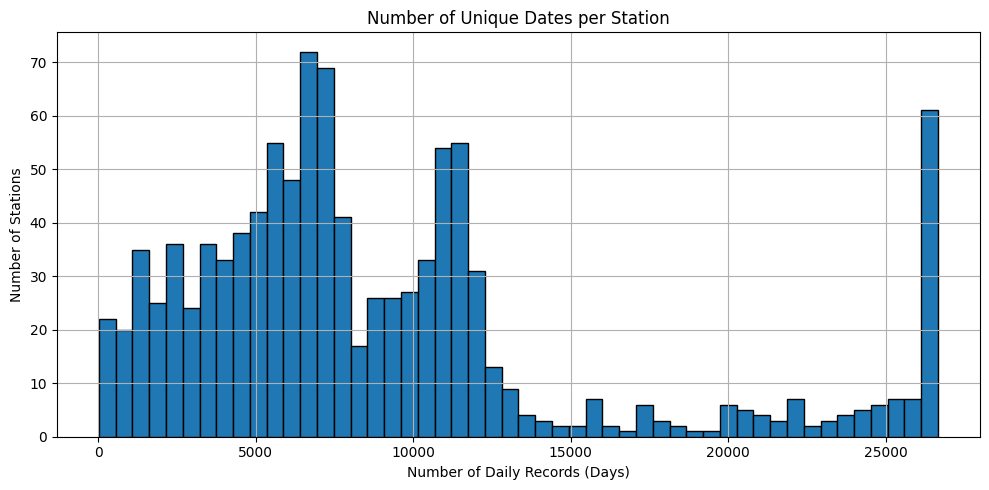

In [14]:
import matplotlib.pyplot as plt

# Count unique days per station
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(station_counts, bins=50, edgecolor='black')
plt.title("Number of Unique Dates per Station")
plt.xlabel("Number of Daily Records (Days)")
plt.ylabel("Number of Stations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()
top_stations = station_counts[station_counts >= 26000].index
df_top = df[df['NOM_USUEL'].isin(top_stations)].copy()

In [16]:
dep_to_region = {
    '01': 'Auvergne-Rhône-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rhône-Alpes',
    '04': 'Provence-Alpes-Côte d\'Azur', '05': 'Provence-Alpes-Côte d\'Azur',
    '06': 'Provence-Alpes-Côte d\'Azur', '07': 'Auvergne-Rhône-Alpes',
    '08': 'Grand Est', '09': 'Occitanie', '10': 'Grand Est', '11': 'Occitanie',
    '12': 'Occitanie', '13': 'Provence-Alpes-Côte d\'Azur', '14': 'Normandie',
    '15': 'Auvergne-Rhône-Alpes', '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine', '2A': 'Corse',
    '2B': 'Corse', '21': 'Bourgogne-Franche-Comté', '22': 'Bretagne',
    '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine', '25': 'Bourgogne-Franche-Comté',
    '26': 'Auvergne-Rhône-Alpes', '27': 'Normandie', '28': 'Centre-Val de Loire',
    '29': 'Bretagne', '30': 'Occitanie', '31': 'Occitanie', '32': 'Occitanie',
    '33': 'Nouvelle-Aquitaine', '34': 'Occitanie', '35': 'Bretagne',
    '36': 'Centre-Val de Loire', '37': 'Centre-Val de Loire', '38': 'Auvergne-Rhône-Alpes',
    '39': 'Bourgogne-Franche-Comté', '40': 'Nouvelle-Aquitaine', '41': 'Centre-Val de Loire',
    '42': 'Auvergne-Rhône-Alpes', '43': 'Auvergne-Rhône-Alpes', '44': 'Pays de la Loire',
    '45': 'Centre-Val de Loire', '46': 'Occitanie', '47': 'Nouvelle-Aquitaine',
    '48': 'Occitanie', '49': 'Pays de la Loire', '50': 'Normandie', '51': 'Grand Est',
    '52': 'Grand Est', '53': 'Pays de la Loire', '54': 'Grand Est', '55': 'Grand Est',
    '56': 'Bretagne', '57': 'Grand Est', '58': 'Bourgogne-Franche-Comté',
    '59': 'Hauts-de-France', '60': 'Hauts-de-France', '61': 'Normandie',
    '62': 'Hauts-de-France', '63': 'Auvergne-Rhône-Alpes', '64': 'Nouvelle-Aquitaine',
    '65': 'Occitanie', '66': 'Occitanie', '67': 'Grand Est', '68': 'Grand Est',
    '69': 'Auvergne-Rhône-Alpes', '70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté', '72': 'Pays de la Loire', '73': 'Auvergne-Rhône-Alpes',
    '74': 'Auvergne-Rhône-Alpes', '75': 'Île-de-France', '76': 'Normandie',
    '77': 'Île-de-France', '78': 'Île-de-France', '79': 'Nouvelle-Aquitaine',
    '80': 'Hauts-de-France', '81': 'Occitanie', '82': 'Occitanie',
    '83': 'Provence-Alpes-Côte d\'Azur', '84': 'Provence-Alpes-Côte d\'Azur',
    '85': 'Pays de la Loire', '86': 'Nouvelle-Aquitaine', '87': 'Nouvelle-Aquitaine',
    '88': 'Grand Est', '89': 'Bourgogne-Franche-Comté', '90': 'Bourgogne-Franche-Comté',
    '91': 'Île-de-France', '92': 'Île-de-France', '93': 'Île-de-France',
    '94': 'Île-de-France', '95': 'Île-de-France'
}

In [17]:
dep_to_region['20'] = 'Corse'

In [18]:
stations_geo = df_top.groupby('NOM_USUEL')[['LAT', 'LON', 'DEP']].first().reset_index()

In [19]:
# Ensure DEP is string-padded correctly
stations_geo['DEP'] = stations_geo['DEP'].astype(str).str.zfill(2)

# Now map to region
stations_geo['REGION'] = stations_geo['DEP'].map(dep_to_region)

In [20]:
print(stations_geo[['NOM_USUEL', 'DEP', 'REGION']].head())

         NOM_USUEL DEP                REGION
0        ABBEVILLE  80       Hauts-de-France
1  AGEN-LA GARENNE  47    Nouvelle-Aquitaine
2          AJACCIO  20                 Corse
3          ALENCON  61             Normandie
4         AMBERIEU  01  Auvergne-Rhône-Alpes


In [3]:
stations_geo

NameError: name 'stations_geo' is not defined

## SHOW TOP 60+ STATIONS WITH OVER 26000 RECORDS

In [21]:
##Colours by region plotted
import seaborn as sns
import folium

# Color by region
unique_regions = stations_geo['REGION'].dropna().unique()
region_palette = sns.color_palette("hsv", len(unique_regions)).as_hex()
region_colors = dict(zip(unique_regions, region_palette))

map_by_region = folium.Map(location=[46.5, 2.5], zoom_start=6)

for _, row in stations_geo.iterrows():
    region = row['REGION']
    color = region_colors.get(region, 'gray')

    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.9,
        popup=f"{row['NOM_USUEL']} ({region})"
    ).add_to(map_by_region)

map_by_region.save("map_stations_by_region.html")
print("✅ Saved map by region: map_stations_by_region.html")

✅ Saved map by region: map_stations_by_region.html


In [22]:
# Color by department
unique_deps = stations_geo['DEP'].unique()
dep_palette = sns.color_palette("tab20", len(unique_deps)).as_hex()
dep_colors = dict(zip(unique_deps, dep_palette))

map_by_department = folium.Map(location=[46.5, 2.5], zoom_start=6)

for _, row in stations_geo.iterrows():
    dep = row['DEP']
    color = dep_colors.get(dep, 'gray')

    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.9,
        popup=f"{row['NOM_USUEL']} (Dept {dep})"
    ).add_to(map_by_department)

map_by_department.save("map_stations_by_department.html")
print("✅ Saved map by department: map_stations_by_department.html")

✅ Saved map by department: map_stations_by_department.html


In [23]:
map_by_department

In [24]:
map_by_region

In [25]:
stations_geo.head()

,NOM_USUEL,LAT,LON,DEP,REGION
0,ABBEVILLE,50.136000,1.834000,80,Hauts-de-France
1,AGEN-LA GARENNE,44.172167,0.594667,47,Nouvelle-Aquitaine
2,AJACCIO,41.918000,8.792667,20,Corse
3,ALENCON,48.445500,0.110167,61,Normandie
4,AMBERIEU,45.976500,5.329333,01,Auvergne-Rhône-Alpes


In [26]:
df

,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP,day_of_year,month,year,weekday,TM_lag1,TM_lag365,TM_roll7,TM_roll30,RR_roll7,FFM_roll7
0,ABAINVILLE,48.528000,5.498667,2006-03-31,0.0,10.4,15.3,11.4,5.1,55,90,3,2006,4,11.3,9.7,11.071429,4.113333,5.914286,5.114286
1,ABAINVILLE,48.528000,5.498667,2006-04-01,2.0,6.4,16.2,10.6,3.9,55,91,4,2006,5,11.4,9.4,11.000000,4.503333,4.200000,4.871429
2,ABAINVILLE,48.528000,5.498667,2006-04-02,6.6,6.9,14.4,9.6,4.8,55,92,4,2006,6,10.6,10.6,10.214286,4.753333,4.457143,4.871429
3,ABAINVILLE,48.528000,5.498667,2006-04-03,0.0,6.5,12.8,8.1,4.0,55,93,4,2006,0,9.6,11.1,9.571429,5.046667,4.114286,4.742857
4,ABAINVILLE,48.528000,5.498667,2006-04-04,0.2,-1.4,12.0,5.6,2.0,55,94,4,2006,1,8.1,11.5,9.185714,5.320000,3.285714,4.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466426,WY-DIT,49.108167,1.830667,2023-12-27,0.2,8.1,10.2,9.0,6.3,95,361,12,2023,2,10.1,6.1,10.042857,6.550000,0.371429,7.257143
9466427,WY-DIT,49.108167,1.830667,2023-12-28,0.0,7.9,11.7,9.5,6.1,95,362,12,2023,3,9.0,9.8,9.914286,6.736667,0.257143,6.800000
9466428,WY-DIT,49.108167,1.830667,2023-12-29,1.0,8.0,11.3,9.6,7.0,95,363,12,2023,4,9.5,8.7,9.914286,6.916667,0.314286,6.700000
9466429,WY-DIT,49.108167,1.830667,2023-12-30,1.0,6.3,10.9,9.0,6.3,95,364,12,2023,5,9.6,10.6,9.814286,7.110000,0.457143,6.500000


In [3]:
df.shape

(51814, 10)